In [1]:
from sympy import *
from sympy.solvers.solveset import solveset
init_printing()
x, y, z = symbols('x,y,z')

<!--## Solveset

Equation solving is both a common need also a common building block for more complicated symbolic algorithms.  

Here we introduce the `solveset` function.-->
## Solveset

La resolución de ecuaciones es una necesidad común y también un elemento común para algoritmos simbólicos más complicados.

Aquí presentamos la función `solveset`.

In [2]:
solveset(x**2 - 4, x)

<!--Solveset takes two arguments and one optional argument specifying the domain, an equation like $x^2 - 4$ and a variable on which we want to solve, like $x$ and an optional argument domain specifying the region in which we want to solve.

Solveset returns the values of the variable, $x$, for which the equation, $x^2 - 4$ equals 0.-->

*Solveset* toma dos argumentos y un argumento opcional que especifica el dominio, una ecuación como $x^2 - 4$ y una variable sobre la cual queremos resolver, como $x$ y un argumento opcional *domain* que especifica la región en la que queremos resolver .

*Solveset* devuelve los valores de la variable, $x$, para los cuales la ecuación, $x^2 - 4$ es igual a 0.

<!--### Exercise

What would the following code produce?  Are you sure?-->

### Ejercicio

¿Qué produciría el siguiente código? ¿Estás seguro?

In [3]:
solveset(x**2 - 9 == 0, x)

<!--## Infinite Solutions

One of the major improvements of `solveset` is that it also supports infinite solution.-->

## Soluciones infinitas

Una de las principales mejoras de `solveset` es que también admite una solución infinita.

In [4]:
solveset(sin(x), x)

<!--## Domain argument-->
## Argumento *domain*

In [5]:
solveset(exp(x) -1, x)

<!--`solveset` by default solves everything in the complex domain. In complex domain $\exp(x) == \cos(x) + i\ sin(x)$ and solution is basically equal to solution to $cos(x) == 1$. If you want only real solution, you can specify the domain as `S.Reals`.-->
`solveset` por defecto resuelve todo en el dominio complejo. En el dominio complejo $\exp(x) = \cos(x) + i\sin(x)$ y la solución es básicamente igual a la solución de $\cos(x) = 1$. Si solo desea una solución real, puede especificar el dominio como `S.Reals`.

In [6]:
solveset(exp(x) -1, x, domain=S.Reals)

<!--## Condition Set

`solveset` isn't always able to solve a given equation, such cases it returns a `ConditionSet` object. `ConditionSet` represents a set satisfying a given condition.-->

`solveset` no siempre es capaz de resolver una ecuación dada, en tales casos devuelve un objeto` ConditionSet`. `ConditionSet` representa un conjunto que satisface una condición dada.

In [7]:
solveset(exp(x) + cos(x) + 1, x, domain=S.Reals)

<!--`solveset` aims to return all the solutions of the equation. In cases where it able to find some solution but not all it returns a union of the known solutions and `ConditionSet`.-->

`solveset` tiene como objetivo devolver todas las soluciones de la ecuación. En los casos en que puede encontrar alguna solución pero no todas, devuelve una unión de las soluciones conocidas y `ConditionSet`.

In [8]:
solveset((x - 1)*(exp(x) + cos(x) + 1), x, domain=S.Reals)

<!--## Symbolic use of `solveset`

Results of `solveset` don't need to be numeric, like `{-2, 2}`.  We can use solveset to perform algebraic manipulations.  For example if we know a simple equation for the area of a square

    area = height * width
    
we can solve this equation for any of the variables.  For example how would we solve this system for the `height`, given the `area` and `width`?-->

## Uso simbólico de `solveset`

Los resultados de `solveset` no necesitan ser numéricos, como `{-2, 2}`. Podemos usar solveset para realizar manipulaciones algebraicas. Por ejemplo, si conocemos una ecuación simple para el área de un cuadrado

    area = height * width

podemos resolver esta ecuación para cualquiera de las variables. Por ejemplo, ¿cómo resolveríamos este sistema para `height`, dado `area` y `width`?

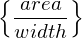

In [9]:
height, width, area = symbols('height, width, area')
solveset(area - height*width, height)

<!--Note that we would have liked to have written

    solveset(area == height * width, height)
    
But the `==` gotcha bites us.  Instead we remember that `solveset` expects an expression that is equal to zero, so we rewrite the equation

    area = height * width
    
into the equation

    0 = height * width - area
    
and that is what we give to solveset.-->

Tenga en cuenta que nos hubiera gustado haber escrito

    solveset(area == height * width, height)

Pero el *gotcha* `==` nos muerde. En cambio, recordamos que `solveset` espera una expresión que sea igual a cero, por lo que reescribimos la ecuación

    area = height * width

en la ecuación

    0 = height * width - area

y eso es lo que le damos a `solveset`.

### Exercise

Compute the radius of a sphere, given the volume.  Reminder, the volume of a sphere of radius `r` is given by

$$ V = \frac{4}{3}\pi r^3 $$

In [ ]:
# Solve for the radius of a sphere, given the volume


You will probably get several solutions, this is fine.  The first one is probably the one that you want.

## Substitution

We often want to substitute in one expression for another.  For this we use the subs method

In [ ]:
x**2

In [ ]:
# Replace x with y
(x**2).subs({x: y})

### Exercise

Subsitute $x$ for $sin(x)$ in the equation $x^2 + 2\cdot x + 1$

In [ ]:
# Replace x with sin(x)



## Subs + Solveset

We can use subs and solve together to plug the solution of one equation into another

In [ ]:
# Solve for the height of a rectangle given area and width

soln = list(solveset(area - height*width, height))[0]
soln

In [ ]:
# Define perimeter of rectangle in terms of height and width

perimeter = 2*(height + width)

In [ ]:
# Substitute the solution for height into the expression for perimeter

perimeter.subs({height: soln})

### Exercise

In the last section you solved for the radius of a sphere given its volume

In [ ]:
V, r = symbols('V,r', real=True)
4*pi/3 * r**3

In [ ]:
list(solveset(V - 4*pi/3 * r**3, r))[0]

Now lets compute the surface area of a sphere in terms of the volume.  Recall that the surface area of a sphere is given by

$$ 4 \pi r^2 $$

In [ ]:
(?).subs(?)

Does the expression look right?  How would you expect the surface area to scale with respect to the volume?  What is the exponent on $V$?

## Plotting

SymPy can plot expressions easily using the `plot` function.  By default this links against matplotlib.

In [ ]:
%matplotlib inline

In [ ]:
plot(x**2)

### Exercise

In the last exercise you derived a relationship between the volume of a sphere and the surface area.  Plot this relationship using `plot`.

In [ ]:
plot(?)

## Low dependencies

You may know that SymPy tries to be a very low-dependency project.  Our user base is very broad.  Some entertaining aspects result.  For example, `textplot`.

In [ ]:
textplot(x**2, -3, 3)

### Exercise

Play with `textplot` and enjoy :)